<a href="https://colab.research.google.com/github/Danielhay016/Advanced-NLP-with-Python-for-Machine-Learning/blob/main/C3/NLP_C3_Challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1: Install Libraries and Modules
!pip install spacy
!python -m spacy download en_core_web_sm
#pip install textblob
#python -m textblob.download_corpora
#modules
import spacy
from textblob import TextBlob
import pandas as pd
import csv
#optinal for to present information visually
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# EXERCISE - SCROLL DOWN TO THE "START HERE" SECTION BELOW.

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Define the path to the file containing feedback
file_path = '/content/feedback_data.csv'

# Read the file using open() with the specified parameters
with open(file_path, "r", encoding="utf-8") as file:
    # Step 2: Read the lines of the file
    feedback_data = file.readlines()

# Add code to output feedback results to a file.
output_csv_path = "feedback_analysis_results.csv"

# Prepare CSV header
csv_header = ["Feedback Index", "Sentiment Polarity", "Sentiment Subjectivity", "Named Entities", "Preferred Contact Method"]

# Open CSV file for writing
with open(output_csv_path, "w", newline="", encoding="utf-8") as csv_file:
    # Create CSV writer
    csv_writer = csv.writer(csv_file)

    # Write the header
    csv_writer.writerow(csv_header)

    #-----------------------------------------------------------------
    # START HERE

    # Loop through each feedback line, keeping both its index (starting from 1) and the text content
    for idx, narrative in enumerate(feedback_data, start=1):

        # Process the feedback text with spaCy to create a Doc object containing linguistic annotations
        doc = nlp(narrative)

        # Perform sentiment analysis using TextBlob - # Use TextBlob to calculate sentiment polarity (-1 to 1) and subjectivity (0 to 1) of the feedback
        blob = TextBlob(narrative)
        sentiment_polarity = blob.sentiment.polarity
        sentiment_subjectivity = blob.sentiment.subjectivity

        # Extract named entities
        entities = [(ent.text, ent.label_) for ent in doc.ents]

        # Determine the preferred contact method
        preferred_contact_method = "chat" if "email" not in narrative.lower() else "email"
        print(f"Preferred Contact Method: {preferred_contact_method}")

        # Write the results to the CSV file
        csv_writer.writerow([idx, sentiment_polarity, sentiment_subjectivity, entities, preferred_contact_method])


Preferred Contact Method: email
Preferred Contact Method: email
Preferred Contact Method: chat
Preferred Contact Method: email


In [ ]:
# Load results file into a Pandas DataFrame using pd from cvs to table
results_df = pd.read_csv("feedback_analysis_results.csv")

# Display the first rows of the DataFrame (first 5 rows)
results_df.head()

,Feedback Index,Sentiment Polarity,Sentiment Subjectivity,Named Entities,Preferred Contact Method
0,1,0.441667,0.666667,"[('Los Angeles', 'GPE')]",email
1,2,0.136364,0.454545,"[('New York', 'GPE')]",email
2,3,0.484091,0.751136,"[('San Francisco', 'GPE')]",chat
3,4,-0.750000,0.750000,"[('Chicago', 'GPE')]",email


In [ ]:
results_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Feedback Index            4 non-null      int64  
 1   Sentiment Polarity        4 non-null      float64
 2   Sentiment Subjectivity    4 non-null      float64
 3   Named Entities            4 non-null      object 
 4   Preferred Contact Method  4 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 292.0+ bytes


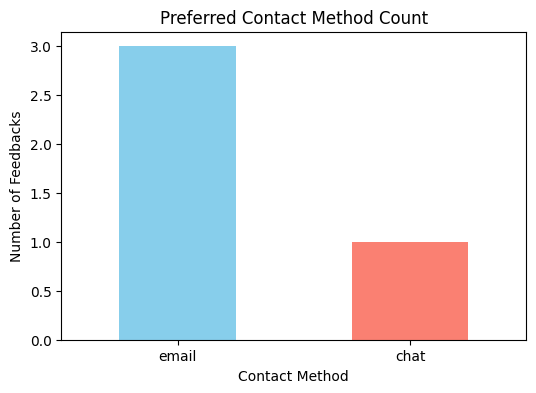

In [ ]:

# Example plot: Preferred Contact Method Count
# Count the number of occurrences for each contact method
contact_counts = results_df['Preferred Contact Method'].value_counts()

# Plot a bar chart
plt.figure(figsize=(6,4))
contact_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Preferred Contact Method Count")
plt.xlabel("Contact Method")
plt.ylabel("Number of Feedbacks")
plt.xticks(rotation=0)
plt.show()

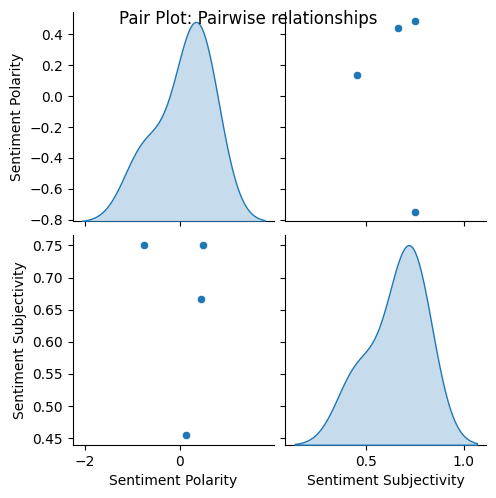

In [ ]:

# Pair Plot: Pairwise relationships
sns.pairplot(data=results_df[['Sentiment Polarity', 'Sentiment Subjectivity']],
             diag_kind='kde')
plt.suptitle('Pair Plot: Pairwise relationships')
plt.show()
